KB Report 에서 오른쪽 위 표 데이터 가져와서 출력하기
- http://www.kbreport.com/main

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
url = 'http://www.kbreport.com/teams/main'
url = 'file:///C:/Users/wtime/Downloads/팀 타격메인기록 _ KBReport.html'
tables = pd.read_html(url, index_col=1) #1번째 컬럼이 인덱스다
len(tables)

2

In [8]:
baseball = tables[0]
baseball.shape

(11, 20)

In [11]:
data = baseball.iloc[:-1]

In [41]:
data

,#,경기,승,무,패,승률,기대승률,R/G,득점,홈런,도루,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
팀명,,,,,,,,,,,,,,,,,,,,
SK,1.0,77,51,1,25,0.671,0.606,4.70,362,69,56,8.5,17.7,0.303,0.263,0.337,0.387,0.724,0.329,8.69
두산,2.0,78,48,0,30,0.615,0.625,5.03,392,47,52,11.3,15.5,0.313,0.273,0.361,0.390,0.751,0.346,14.22
LG,3.0,76,43,1,32,0.573,0.522,4.25,323,48,55,8.1,17.0,0.303,0.260,0.329,0.368,0.697,0.318,5.22
Hero,4.0,79,45,0,34,0.570,0.597,5.34,422,59,57,9.3,17.2,0.326,0.280,0.353,0.409,0.762,0.346,14.43
NC,5.0,76,37,0,39,0.487,0.486,4.64,353,71,37,7.7,16.9,0.318,0.279,0.343,0.419,0.762,0.342,11.71
삼성,6.0,76,33,0,43,0.434,0.480,4.66,353,68,58,8.6,18.0,0.308,0.266,0.337,0.406,0.743,0.334,10.41
KIA,7.0,76,32,1,43,0.427,0.433,4.47,340,41,50,9.5,17.0,0.317,0.269,0.345,0.381,0.726,0.333,9.65
KT,8.0,78,33,0,45,0.423,0.411,4.27,333,52,52,8.7,18.3,0.319,0.269,0.338,0.369,0.707,0.325,7.44
한화,9.0,76,31,0,45,0.408,0.443,4.45,338,51,67,9.1,21.2,0.305,0.249,0.325,0.363,0.688,0.315,4.62


In [13]:
data.info() #object 로 잡혀있는 항목 있는지 확인

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, SK to 롯데
Data columns (total 20 columns):
#        10 non-null float64
경기       10 non-null int64
승        10 non-null int64
무        10 non-null int64
패        10 non-null int64
승률       10 non-null object
기대승률     10 non-null object
R/G      10 non-null float64
득점       10 non-null int64
홈런       10 non-null int64
도루       10 non-null int64
볼넷%      10 non-null float64
삼진%      10 non-null float64
BABIP    10 non-null float64
타율       10 non-null float64
출루율      10 non-null float64
장타율      10 non-null float64
OPS      10 non-null float64
wOBA     10 non-null float64
WAR      10 non-null float64
dtypes: float64(11), int64(7), object(2)
memory usage: 1.6+ KB


In [17]:
data.기대승률

팀명
SK      0.606
두산      0.625
LG      0.522
Hero    0.597
NC      0.486
삼성      0.480
KIA     0.433
KT      0.411
한화      0.443
롯데      0.420
Name: 기대승률, dtype: object

In [54]:
#data['승률'] = data['승률'].astype('float') # 타입변경
#data['기대승률'] = data['기대승률'].astype('float') # 타입변경

data.loc[:,'승률'] = data['승률'].astype('float') # 타입변경
data.loc[:,'기대승률'] = data['기대승률'].astype('float') # 타입변경

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, SK to 롯데
Data columns (total 20 columns):
#        10 non-null float64
경기       10 non-null int64
승        10 non-null int64
무        10 non-null int64
패        10 non-null int64
승률       10 non-null float64
기대승률     10 non-null float64
R/G      10 non-null float64
득점       10 non-null int64
홈런       10 non-null int64
도루       10 non-null int64
볼넷%      10 non-null float64
삼진%      10 non-null float64
BABIP    10 non-null float64
타율       10 non-null float64
출루율      10 non-null float64
장타율      10 non-null float64
OPS      10 non-null float64
wOBA     10 non-null float64
WAR      10 non-null float64
dtypes: float64(13), int64(7)
memory usage: 2.0+ KB


- 승률을 bar 그래프로
- 승률과 홈런의 관계는?
- 팀별 득점 점수
- 승률과 실점의 관계
- 나의 홈팀과 가장 유사한 성격의 팀을 찾아라

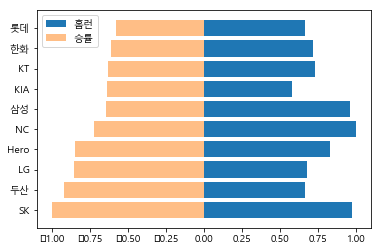

In [47]:
plt.rc('font', family='Malgun Gothic')
plt.barh(data.index, data['홈런']/data['홈런'].max(), label='홈런') # barh(x,y)
plt.barh(data.index, -data['승률']/data['승률'].max(), alpha=0.5, label='승률')
plt.legend()

In [48]:
data = baseball.iloc[:-1]

In [49]:
data.head(1)

,#,경기,승,무,패,승률,기대승률,R/G,득점,홈런,도루,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
팀명,,,,,,,,,,,,,,,,,,,,
SK,1.0,77,51,1,25,0.671,0.606,4.7,362,69,56,8.5,17.7,0.303,0.263,0.337,0.387,0.724,0.329,8.69


<BarContainer object of 10 artists>

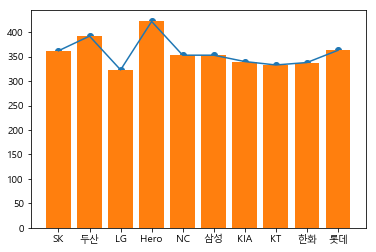

In [50]:
plt.plot(data.index, data['득점'])
plt.scatter(data.index, data['득점'])
plt.bar(data.index, data['득점'])

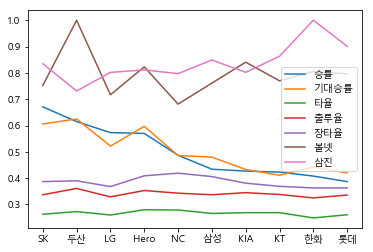

In [56]:
# % 승률, 기대슬률, 타율, 출루율, 장타율
col = ['승률','기대승률', '타율','출루율','장타율']
for c in col:
    plt.plot(data.index, data[c], label=c)
plt.plot(data.index, data['볼넷%']/data['볼넷%'].max(), label = '볼넷')
plt.plot(data.index, data['삼진%']/data['삼진%'].max(), label = '삼진')
plt.legend()

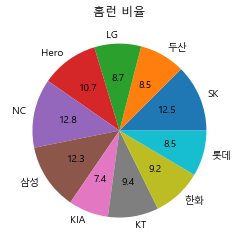

In [61]:
plt.title("홈런 비율")
p = plt.pie(data.홈런, labels=data.index, autopct='%.1f')

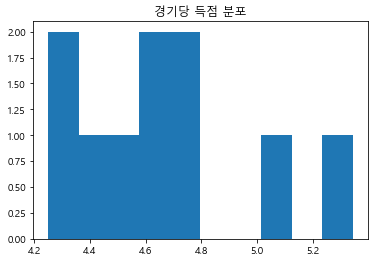

In [62]:
p = plt.title("경기당 득점 분포")
p = plt.hist(data.득점/data.경기, bins=10)

In [65]:
name = input('홈팀을 말하세요')
name

홈팀을 말하세요KIA


'KIA'

In [66]:
data.loc[name]

#          7.000
경기        76.000
승         32.000
무          1.000
패         43.000
승률         0.427
기대승률       0.433
R/G        4.470
득점       340.000
홈런        41.000
도루        50.000
볼넷%        9.500
삼진%       17.000
BABIP      0.317
타율         0.269
출루율        0.345
장타율        0.381
OPS        0.726
wOBA       0.333
WAR        9.650
Name: KIA, dtype: float64

In [68]:
#정규화
data_normal = data/data.max()
data_normal.head()

,#,경기,승,무,패,승률,기대승률,R/G,득점,홈런,도루,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
팀명,,,,,,,,,,,,,,,,,,,,
SK,0.1,0.974684,1.000000,1.0,0.543478,1.000000,0.9696,0.880150,0.857820,0.971831,0.835821,0.752212,0.834906,0.929448,0.939286,0.933518,0.923628,0.950131,0.950867,0.602218
두산,0.2,0.987342,0.941176,0.0,0.652174,0.916542,1.0000,0.941948,0.928910,0.661972,0.776119,1.000000,0.731132,0.960123,0.975000,1.000000,0.930788,0.985564,1.000000,0.985447
LG,0.3,0.962025,0.843137,1.0,0.695652,0.853949,0.8352,0.795880,0.765403,0.676056,0.820896,0.716814,0.801887,0.929448,0.928571,0.911357,0.878282,0.914698,0.919075,0.361746
Hero,0.4,1.000000,0.882353,0.0,0.739130,0.849478,0.9552,1.000000,1.000000,0.830986,0.850746,0.823009,0.811321,1.000000,1.000000,0.977839,0.976134,1.000000,1.000000,1.000000
NC,0.5,0.962025,0.725490,0.0,0.847826,0.725782,0.7776,0.868914,0.836493,1.000000,0.552239,0.681416,0.797170,0.975460,0.996429,0.950139,1.000000,1.000000,0.988439,0.811504


In [75]:
#[100,1] [110,8] [120,15]
home = data_normal.loc[name]
# 홈팀과 다른팀과의 차이, 차이가 작은 팀들을 찾습니다.
# 홈팀과 다른팀과의 차이, 차이의 합이 작은 팀들을 찾습니다.
차이 = np.sum(np.square(data_normal -  home), axis=1)

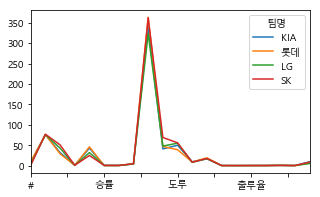

In [79]:
i = 차이.sort_values().index[:4]
data.loc[i].T.plot(figsize=(5,3))

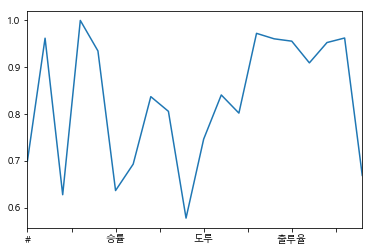

In [78]:
home.plot()